# 演習1 - トフォリゲート

## 歴史的背景


40年前、50人の思想家からなるグループがMITのエンディコット・ハウスの芝生で写真を撮るために並びました。1981年に開催された、MITとIBMが共同で開催した計算物理に関する会議(Physics of Computation Conference)において、歴史を作っていると思った人はその時、ほとんどいませんでした。そこは、コンピューティングの物理、特に今、急成長中の分野で、教科書や大学のコースにふさわしい重要な科目である、量子コンピューティングが間違いなく誕生した場所であったのです。

この会議で、ファインマンがあの有名な言葉を述べました：「自然は古典的ではない。自然のシミュレーションをしたいなら、量子力学的にしなければならない。なんと、それは素晴らしい問題だ。なぜなら、そう簡単な問題には見えないからだ。」[1] 今月初めに、我々は、この重要な会議の40周年を祝いました。[こちら](https://qiskit.org/events/physics-of-computation/)でその詳細を読むことができます。

![](resources/conference-photo.jpeg)

この会議で議論されたテーマのうちの一つに、可逆計算がありました。それは、MITのトマソ・トフォリとエドワード・フレドキンがその過去数年にわたりすでに考えていたことでした。[2-3] トフォリは、AND/NANDゲートの可逆バージョンを思いつきました(これは現在トフォリゲートまたは制御制御NOTゲートと呼ばれています)。NANDゲートは古典コンピューターでは普遍的であるので、トフォリゲートは、普遍的で可逆な論理ゲートになります。量子コンピューティングは、可逆コンピューティングの特別な形です：量子コンピューター上ではどんな可逆なゲートも実装でき、よってトフォリゲートも量子論理ゲートとなります。しかし、トフォリゲートのみでは、量子コンューティングにおける普遍的なゲートとはなりません。

この演習では、トフォリゲート、また、量子コンピューターにおける普遍的なゲートセットについて探究します。

### 参考文献
1. Feynman, Richard P. "Simulating physics with computers." Int. J. Theor. Phys 21.6/7 (1982).
1. Toffoli, Tommaso. "Reversible computing." International colloquium on automata, languages, and programming. Springer, Berlin, Heidelberg, 1980.
1. Fredkin, Edward, and Tommaso Toffoli. "Conservative logic." International Journal of theoretical physics 21.3 (1982): 219-253.

## 古典的な論理ゲート


古典的な計算でよく使用されるモデルの1つは、ブール論理ゲートまたは古典論理ゲートです。このゲートは、ブール関数、つまりバイナリー（0,1）の入力と出力のみを持つ関数を表します。
ブール論理の興味深い側面の1つは、少数の異なる論理ゲートの組み合わせを使用するだけで、すべての可能なバイナリー関数を形成できることです。このようなセットは、機能的に完全なセットと呼ばれます。このような有名なセットの1つは、ANDとNOTです。この2つのゲートは、すべての可能な機能を表現するのに十分です。ORとNOTについても同じことが言えます。NANDやNORなどは、単体で普遍性をもつ小さなセットですが、関数AND、NOT、ORは、古典的な計算の基本ブロックとして見なされることがよくあります。


<div class="alert alert-block alert-success">

**目標**

IBMの量子システムの基本ゲートセット(CX, RZ, SX, Xゲート)を使ってトフォリゲートを構築します。

</div>

<div class="alert alert-block alert-danger">
    

この演習では、量子ゲートの基本的な概念を学び、量子回路の構築方法を学ぶことが目的です。
    
1. Circuit Composerウィジェットを使って視覚的に学びます。
1. Qiskitを使ってプログラミングを学びます。

    
すでに量子ゲートとQiskitに慣れている場合は、直接、<a href=#problem>問題</a> に飛ぶことができます。
</div>

In [1]:
# 不要な警告を取り除きます
import warnings
from matplotlib.cbook import MatplotlibDeprecationWarning
warnings.filterwarnings('ignore', category=MatplotlibDeprecationWarning)

# Qiskitの標準的なライブラリーをインポートします
from qiskit import QuantumCircuit, execute, Aer, IBMQ, QuantumRegister, ClassicalRegister
from qiskit.compiler import transpile, assemble
from qiskit.tools.jupyter import *
from qiskit.visualization import *
from ibm_quantum_widgets import *

# piを設定しておくと便利です
import math
pi=math.pi

C:\Users\AyumuShiraishi\Anaconda3\envs\qiskit\lib\site-packages\numpy\_distributor_init.py:32: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\AyumuShiraishi\Anaconda3\envs\qiskit\lib\site-packages\numpy\.libs\libopenblas.JPIJNSWNNAN3CE6LLI5FWSPHUT2VXMTH.gfortran-win_amd64.dll
C:\Users\AyumuShiraishi\Anaconda3\envs\qiskit\lib\site-packages\numpy\.libs\libopenblas.PYQHXLVVQ7VESDPUVUADXEVJOBGHJPAY.gfortran-win_amd64.dll
  stacklevel=1)


## 量子回路とは何でしょうか?

量子回路は、計算が一連の量子ゲートによって行われる、量子計算におけるモデルです。量子ゲートは、しばしば、ブロッホ球における回転として表現されます。よく知られている量子ゲートをいくつか見てみましょう。

### Xゲート 
 
Xゲートは、パウリのX行列によって表されます：

$X = \begin{pmatrix}
0 & 1 \\
1 & 0 \\
\end{pmatrix}$

Xゲートは、ブロッホ球でのX軸まわりの$\pi$ラジアンの回転と等しいです。$|0\rangle$を$|1\rangle$へ、$|1\rangle$を$|0\rangle$へマップします。古典コンピューターにおけるNOTゲートの量子版であり、ビットフリップとも呼ばれます。

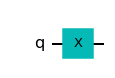

In [2]:
x_gate=QuantumCircuit(1) # 量子ビット1で量子回路を作ります
x_gate.x(0)
x_gate.draw(output='mpl')

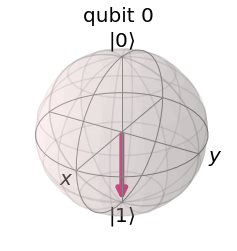

In [3]:
backend = Aer.get_backend('statevector_simulator')
result = execute(x_gate, backend).result().get_statevector()
plot_bloch_multivector(result)

### SXゲート

SXゲートは、ブロッホ球のX軸を中心とした𝜋 / 2の回転に相当します。Xゲートの平方根であることを示すためにSXゲートと呼ばれます。このゲートを2回続けて適用すると、標準のパウリXゲートが生成されます。SXの逆はSXダガーで、反対方向に$\pi/2$回転します。

$SX = \frac{1}{2}\begin{pmatrix}
1+i & 1-i \\
1-i & 1+i \\
\end{pmatrix}$

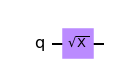

In [4]:
sx_gate = QuantumCircuit(1)
sx_gate.sx(0)  
sx_gate.draw(output='mpl')

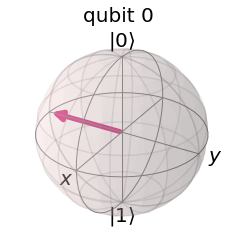

In [5]:
backend = Aer.get_backend('statevector_simulator')
result = execute(sx_gate, backend).result().get_statevector()
plot_bloch_multivector(result)

### RZゲート


Rzゲートは、Z軸のまわりに$\phi$ 回転します(ここで、$\phi$ は実数です)。行列は以下のようになります：


$RZ = \begin{pmatrix}
1 & 0 \\
0 & e ^{i \phi } \\
\end{pmatrix}$

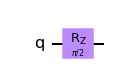

In [6]:
rz_gate = QuantumCircuit(1)
rz_gate.rz(pi/2, 0)
rz_gate.draw(output='mpl')

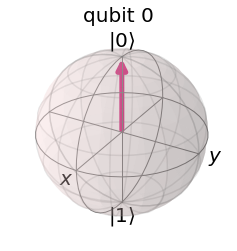

In [7]:
backend = Aer.get_backend('statevector_simulator')
result = execute(rz_gate, backend).result().get_statevector()
plot_bloch_multivector(result)

Z軸まわりの回転のため、デフォルトの状態$|0\rangle$に適用しても違いがわからないので、SXゲートを適用して生成された状態を代わりに使用し、そこにRZを適用します。

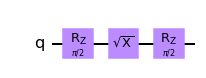

In [8]:
rz_gate.sx(0)
rz_gate.rz(pi/2, 0)
rz_gate.draw(output='mpl')

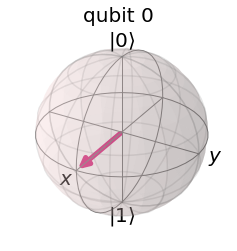

In [9]:
backend = Aer.get_backend('statevector_simulator')
result = execute(rz_gate, backend).result().get_statevector()
plot_bloch_multivector(result)

### Hゲート

アダマールゲートは、$X$軸と$Z$軸の間の軸の周りに$\pi$回転します。
基本状態$|0\rangle$を$\frac{|0\rangle + |1\rangle}{\sqrt{2}}$にマップします。これは、測定値が`1`または`0`になる確率が等しくなり、つまり状態の「重ね合わせ」が作られることを意味します。
この状態は$|+\rangle$とも書かれます。
アダマールは、$|0\rangle$ $|1\rangle$基底と$|+\rangle$ $|-\rangle$基底を変換します。

$H = \frac{1}{\sqrt{2}}\begin{pmatrix}
1 & 1 \\
1 & -1 \\
\end{pmatrix}$

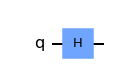

In [10]:
# |0>の量子ビットにHゲートをかけてみます
h_gate = QuantumCircuit(1)
h_gate.h(0)
h_gate.draw(output='mpl')

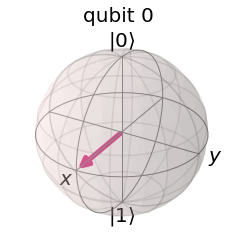

In [11]:
# 結果を見てみましょう
backend = Aer.get_backend('statevector_simulator')
result = execute(h_gate, backend).result().get_statevector()
plot_bloch_multivector(result)

### CXゲート(CNOTゲート)


制御NOT(またはCNOT、またはCX)ゲートは、2量子ビットに作用します。
最初の量子ビットが$|1\rangle$の時のみ、2個目の量子ビットにNOT演算(Xゲートをかけるのと等しい)を適用し、それ以外の場合は何もしません。

注意：Qiskitでは、文字列のビットに、右から左へ向かって番号を付けます。

$CX = \begin{pmatrix}
1 & 0 & 0 & 0  \\
0 & 1 & 0 & 0 \\
0 & 0 & 0 & 1 \\
0 & 0 & 1 & 0 \\
\end{pmatrix}$

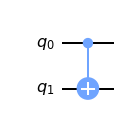

In [12]:
cx_gate = QuantumCircuit(2)
cx_gate.cx(0,1)
cx_gate.draw(output='mpl')

### CCXゲート (トフォリゲート)

CCXゲート(制御制御Xゲート)は、トフォリゲートとも呼ばれます。CCXゲートは3量子ビットゲートで、2個の制御ビットと1個の目標ビットがそれぞれ入力と出力として使われます。
最初の2ビットが$|1\rangle$の状態にある時、パウリX(またはNOT)を3番目のビットに適用します。それ以外の場合は、何もしません。

注意：Qiskitでは、文字列のビットに、右から左へ向かって番号を付けます。


$CCX = \begin{pmatrix}
1 & 0 & 0 & 0 & 0 & 0 & 0 & 0 \\
0 & 1 & 0 & 0 & 0 & 0 & 0 & 0 \\
0 & 0 & 1 & 0 & 0 & 0 & 0 & 0 \\
0 & 0 & 0 & 1 & 0 & 0 & 0 & 0 \\
0 & 0 & 0 & 0 & 1 & 0 & 0 & 0 \\
0 & 0 & 0 & 0 & 0 & 1 & 0 & 0 \\
0 & 0 & 0 & 0 & 0 & 0 & 0 & 1 \\
0 & 0 & 0 & 0 & 0 & 0 & 1 & 0 \\
\end{pmatrix}$

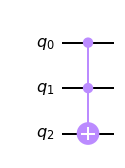

In [13]:
ccx_gate = QuantumCircuit(3)
ccx_gate.ccx(0,1,2)
ccx_gate.draw(output='mpl')

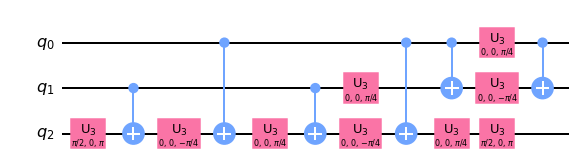

In [14]:
from qiskit.transpiler import PassManager
from qiskit.transpiler.passes import Unroller
from qiskit import QuantumCircuit

ccx_gate = QuantumCircuit(3)
ccx_gate.ccx(0,1,2)

pass_ = Unroller(['u3', 'cx'])
pm = PassManager(pass_)
new_circ = pm.run(ccx_gate)
new_circ.draw(output='mpl')

## 量子ゲートで古典論理ゲートを作る

### NOTゲート：

NOTゲートはビットの値を反転し、以前述べたようにXゲートはNOTゲートとみなすことができます。NOTゲートの真理値表は以下のようになります：

| 入力 | 出力 |
| --- | --- | 
| 1 | 0 |
| 0 | 1 |

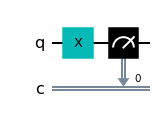

In [15]:
not_gate=QuantumCircuit(1,1) # １量子ビットと1古典ビットで量子回路を作ります
not_gate.x(0)
not_gate.measure(0,0)
not_gate.draw(output='mpl') 

### ANDゲート：

ANDの出力は、入力が両方とも真であった時のみ真になります。ANDゲートの真理値表は以下のようになります：

| A (入力) | B (入力) | 出力 |
| --- | --- | --- |
| 0 | 0 | 0 | 
| 0 | 1 | 0 |
| 1 | 0 | 0 |
| 1 | 1 | 1 |

トフォリゲートを使って、2つの制御ビットを入力ビット、目標ビットを出力ビットとみなすことで、ANDゲートの解を得ることができます。

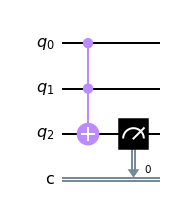

In [16]:
and_gate=QuantumCircuit(3,1) # 3量子ビットと1古典ビットで量子回路を作ります
and_gate.ccx(0,1,2)
and_gate.measure(2,0)
and_gate.draw(output='mpl')

### ORゲート：

ORゲートは、少なくとも一つの入力が真であった時に真を返すゲートです。
真理値表は、以下のようになります：

| A (入力) | B (入力) | 出力 |
| --- | --- | --- |
| 0 | 0 | 0 | 
| 0 | 1 | 1 |
| 1 | 0 | 1 |
| 1 | 1 | 1 |

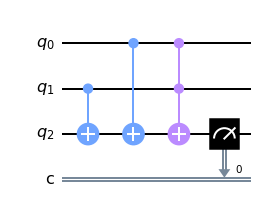

In [17]:
or_gate=QuantumCircuit(3,1) # 3量子ビットと1古典ビットで量子回路を作ります
or_gate.cx(1,2)
or_gate.cx(0,2)
or_gate.ccx(0,1,2)
or_gate.measure(2,0)
or_gate.draw(output='mpl')

## Circuit Composerウィジェットの使用


グラフィカル・インターフェースを使って回路を作成できるIBM quantum circuit composerに詳しいかもしれません。
新しいCircuit Composerウィジェットを使用すると、同じ機能をjupyter notebook上で使うことができます。詳しくは、[こちら](https://quantum-computing.ibm.com/lab/docs/iql/composer-widget)に解説があります。

<div class="alert alert-block alert-success">

**Exercise 1a:** NOR (ORの否定) ゲートをcircuit composerで構築してください

この演習は、composerに慣れていただくためのものです。採点には含まれません。やらないでスキップすることも可能です。以下のセルを実行するとcomposerが現れるので、ゲートを正しい場所にドラッグ・アンド・ドロップしてください。
</div>

In [18]:
from ibm_quantum_widgets import CircuitComposer
editor = CircuitComposer()
editor

CircuitComposer(circuit=<qiskit.circuit.quantumcircuit.QuantumCircuit object at 0x00000286464F4438>)

### Circuit Composerウィジェットに既存の回路を出力する

Circuit composerを使って既に作った回路を開くこともできます。以下の回路で、上で作ったORゲートの回路を開くことができます。これでORを正しく構築できているかどうか確認できます。

<div class="alert alert-block alert-success">
    
開いた回路をドラッグ・アンド・ドロップで編集することも可能です。最後にある測定を削除してみましょう。
        
</div>

In [19]:
from ibm_quantum_widgets import CircuitComposer
editor2 = CircuitComposer(circuit=or_gate)
editor2

CircuitComposer(circuit=<qiskit.circuit.quantumcircuit.QuantumCircuit object at 0x00000286464F4908>)

以下の例では、Composerで最後に作った回路を変数qc2に保存し、その後Xゲートを適用します。

最後に編集した回路を使って、出力にXゲートをかけて再度測定します。

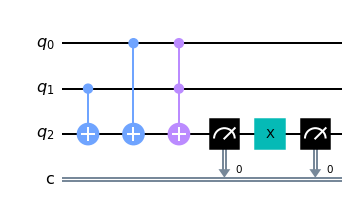

In [20]:
qc2 = editor2.circuit

qc2.x(2)
qc2.measure((2), (0))

qc2.draw(output='mpl')

NORをORを否定することで作ることができました。これは、最初のexerciseで作った回路と同じであるはずです。

## 量子ゲートを組み合わせそのコストを出す

実際の量子コンピューターは通常、すべてのゲートが物理的に実装されていることはありません。代わりに、少ないゲートでユニバーサル・ゲートセットを構成する基本ゲートのセットを使います。これは古典の場合に似て、すべての可能な演算を実装することができる命令のセットです。

このため、Qiskitは、基本ゲートセットのみを使った回路に回路を分解しなければなりません。これは、量子回路がIBM Quantumのシステムに送られる際に、普通は、Qiskit transpilerで自動的に行われます。しかし、学習のために、手を使って、基本ゲートで回路を構築することを期待されています。IBM Quantumシステムの基本ゲートは、通常、CX, ID, RZ, SX, Xゲートです。例として[`ibmq_mumbai`システム](https://quantum-computing.ibm.com/services?skip=0&systems=all&system=ibmq_mumbai)を参考にすることができます。

では、以下の回路をみてみましょう：

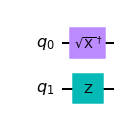

In [21]:
qc = QuantumCircuit(2)
qc.sxdg(0)
qc.z(1)
qc.draw(output='mpl')

次に、基本ゲートのみを使って、上記の回路を量子コンピューターのためにどのように分解するかみてみましょう。

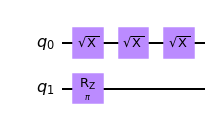

In [22]:
qc = QuantumCircuit(2)
qc.sx(0)
qc.sx(0)
qc.sx(0)
qc.rz(pi,1)
qc.draw(output='mpl')

ご覧の通り、基本ゲートのみを使いましたが、そのためにより多くのゲートが必要になりました。

ご想像の通り、より多くのゲートを使った回路は、実行時により複雑になっていきます。そのため、回路のコストを計算したい場合、使われているゲートの数を考慮します。

しかし、すべてのゲートが等しい価値とはみなされないため、回路のコストを計算する時、以下の式を使います：

**コスト =(CXゲートの数)*10 + (その他の基本ゲートの数)**

### アダマール

上で述べたように、全ての演算は基本ゲートのみを用いて表現できます。ここで、例として、アダマールゲートを基本ゲートセットのみを用いて構築してみます。
$X$軸と$Z$軸の中間の軸にそって回転する基本ゲートはないため、代わりに$X$軸のまわりの回転と$Z$軸のまわりの回転を使って同じ結果を得るようにします。

どのような回転が必要だと思いますか？

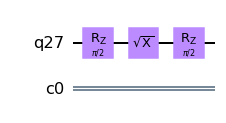

In [23]:
q=QuantumRegister(1)
c=ClassicalRegister(1)
qc=QuantumCircuit(q,c)
qc.rz(pi/2, 0)
qc.sx(0)
qc.rz(pi/2, 0)
qc.draw(output='mpl')

覚えているかもしれませんが、これはさきほどRZゲートの回転を表示したときの回路です。
さきほど、$|0\rangle$または$|1\rangle$の状態にあるとき、最初のRZは何もしないことがわかりました。そのため、少し役に立たないと感じるかもしれません。
しかし、$|+\rangle$と$|-\rangle$の状態では、最初の回転は効果があります。逆のシナリオは、SXゲートを適用した後、再び$|0\rangle$または$|1\rangle$の状態になり、2回目のRZは効果がないというものです。

### 制御回転

先ほど制御NOTの働きを見ましたが、$Y$軸まわりの制御回転をどのように構築するかという例を示しましょう。回転$\theta$はどの角度でもよく、$\pi$である必要はありません。以下は例です。

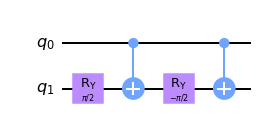

In [24]:
qc = QuantumCircuit(2)
theta = math.pi # thetaは何度でもよいです (任意の値としてpiを選択)
qc.ry(theta/2,1)
qc.cx(0,1)
qc.ry(-theta/2,1)
qc.cx(0,1)
qc.draw(output='mpl')

この回路を見てみると、最初の量子ビットが0の場合、2つの回転がキャンセルされ何も起こらないことが分かります。

一方、最初の量子ビットが1の場合、$\theta / 2$回転を２回適用し、$\theta$回転となる状態を得ます。これは、$X$軸と$Y$軸が直行しているために起こります。

<div class="alert alert-block alert-danger">
その他の軸まわりの回転については、他のトリックを使う必要があるでしょう。
</div>

### 制御制御回転

上記の例で$Y$軸まわりの制御回転を作る例を確認しました。次に、(ある軸まわりに)制御回転できると仮定し、そこから制御制御回転(CCXゲートのように二つの制御量子ビットが1のときのみ作用する回転)を構築したいと思います。

In [25]:
qc = QuantumCircuit(3)
theta = math.pi # thetaは何でも良いです(任意にpiを選択)
qc.cp(theta/2,1,2)
qc.cx(0,1)
qc.cp(-theta/2,1,2)
qc.cx(0,1)
qc.cp(theta/2,0,2)
qc.draw()

q_0: ───────────■──────────────■───■───────
              ┌─┴─┐          ┌─┴─┐ │       
q_1: ─■───────┤ X ├─■────────┤ X ├─┼───────
      │P(π/2) └───┘ │P(-π/2) └───┘ │P(π/2) 
q_2: ─■─────────────■──────────────■───────

この回路では、1個目と2個目の量子ビットが0の場合は、何も起こりません。
2個目の量子ビットのみが1の場合は、最初に$\pi/2$回転が適用され、その後$-\pi/2$回転が適用されるのでキャンセルされます。1個目の量子ビットのみが1の場合には、2個目の量子ビットが最初のCXで1になり、$-\pi/2$の回転が適用され、その後$\pi/2$の回転が適用されるので、この2つの回転はまたお互いにキャンセルされます。

1個目の量子ビットと2個目の量子ビットが1の場合は、最初に$\pi/2$回転が起こり、その後2個目の量子ビットは0になるので、次の回転は適用されず、その後2個目の量子ビットは1に戻ります。その後、1個目の量子ビットが1のため、別の$\pi/2$回転が適用されます。よって、２回の$\pi/2$回転が起こり、$\pi$回転になります。

# 演習 1

<div id='problem'></div>
<div class="alert alert-block alert-success">

先ほど、我々の基本ゲートセットでアダマールゲートをどのように構築するか見ましたが、今度は、トフォリゲートを同じように構築したいと思います。なぜトフォリゲートなのでしょうか？上記で述べたように、トフォリゲートは、古典コンピューターにおいてNANDゲートと同じように、ユニバーサル・ゲートでありますが、可逆的です。さらに、アダマールゲートとともに量子コンピューターではユニバーサル・ゲートを構築します。

基本ゲートを使ってより複雑なゲートを表現するいくつかの例を見てきました。今回は、得られた知識を使って、我々の基本ゲートのみを使ってトフォリゲートを構築します。このために、先ほどの例である、制御回転を構築し使う方法が重宝するでしょう。大きなチャレンジは、制御回転を構築するところです。

回路構築の際に以下のComposerウィジェットを使うことができます。
    
</div>


<div class="alert alert-block alert-danger">

IBM Quantumシステムの基本ゲートはCX、RZ、SX、Xであり、そのほかのゲートは使えないことを覚えておいてください。
    
もちろん、コストの最小化にもトライしてください。(コストは **CNOT** の数の **10倍** **プラス** **その他のゲート** の数です。)
    
$$
Cost = 10 N_{CNOT} + N_{other}
$$
    
</div>


In [26]:
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit
from qiskit import IBMQ, Aer, execute
from ibm_quantum_widgets import CircuitComposer
editorEx = CircuitComposer() 
editorEx
##### composer widgetを使ってここに量子回路を構築してください

CircuitComposer(circuit=<qiskit.circuit.quantumcircuit.QuantumCircuit object at 0x00000286467F07B8>)

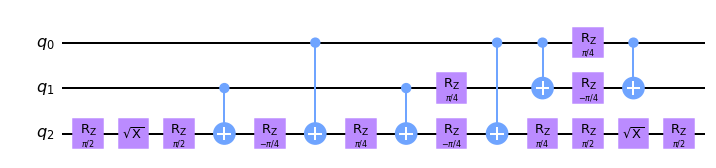

In [27]:
# コスト73の回路

circuit = QuantumCircuit(3)

# この下にコードを書いてください
circuit.rz(pi/2, 2)
circuit.sx(2)
circuit.rz(pi/2, 2)
circuit.cx(1, 2)
circuit.rz(-pi/4,2)
circuit.cx(0, 2)
circuit.rz(pi/4,2)
circuit.cx(1, 2)
circuit.rz(-pi/4,2)
circuit.cx(0, 2)
circuit.rz(pi/4,1)
circuit.rz(pi/4,2) # 量子ビット2のRzゲートが連続しているので統一できる
circuit.cx(0, 1)
circuit.rz(pi/2, 2) # 量子ビット2のRzゲートが連続しているので統一できる
circuit.sx(2)
circuit.rz(pi/2, 2)
circuit.rz(-pi/4,1)
circuit.rz(pi/4,0)
circuit.cx(0, 1)

circuit.draw(output='mpl')

# この上にコードを書いてください

In [28]:
# Qiskitのコードで回路をプログラミングすることもできます
# コスト72

circuit = QuantumCircuit(3)

# この下にコードを書いてください
circuit.rz(pi/2, 2)
circuit.sx(2)
circuit.rz(pi/2, 2)
circuit.cx(1, 2)
circuit.rz(-pi/4,2)
circuit.cx(0, 2)
circuit.rz(pi/4,2)
circuit.cx(1, 2)
circuit.rz(-pi/4,2)
circuit.cx(0, 2)
circuit.rz(pi/4,1)
circuit.cx(0, 1)
circuit.rz(pi*3/4, 2) # 量子ビット2のRzゲートを統一した
circuit.sx(2)
circuit.rz(pi/2, 2)
circuit.rz(-pi/4,1)
circuit.rz(pi/4,0)
circuit.cx(0, 1)


# この上にコードを書いてください

#circuit.measure_all() # すべての量子ビットを測定します

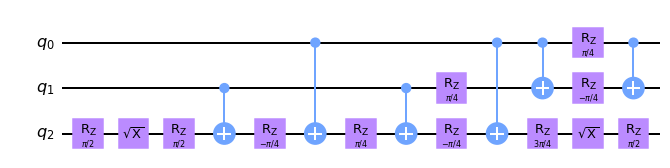

In [29]:
# 結果として得られた回路のチェック
#qc = editorEx.circuit 
qc = circuit # Qiskitでコーディングした回路を提出したい場合はコメントを外してください

qc.draw(output='mpl')

In [30]:
# 以下のコードで答えをチェックしてください
from qc_grader import grade_ex1
grade_ex1(qc)

Grading your answer for ex1. Please wait...

Congratulations 🎉! Your answer is correct.
Your cost is 72.
Feel free to submit your answer.



In [ ]:
# 回答を提出してください。何度でも再提出可能です。
from qc_grader import submit_ex1
submit_ex1(qc)

## Additional information

**Created by:** Marcel Pfaffhauser, Brahmani Thota, Junye Huang

**Version:** 1.0.1